# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState

RANDOM=42
state=RandomState(RANDOM)
TEST_SIZE=0.25

In [4]:
geo_data_0 = pd.read_csv(r'~/geo_data_0.csv')

In [5]:
display(geo_data_0)
geo_data_0.describe()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [6]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
geo_data_1 = pd.read_csv('~/geo_data_1.csv')

In [8]:
display(geo_data_1)
geo_data_1.describe()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [9]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
geo_data_2 = pd.read_csv('~/geo_data_2.csv')

In [11]:
display(geo_data_2)
geo_data_2.describe()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [12]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Датасеты на вид чистые.

Проверим на пропуски и дубли.

In [13]:
print('Количество дубликатов в geo_data_0: ',geo_data_0.duplicated().sum())
print('Количество дубликатов в geo_data_1: ', geo_data_1.duplicated().sum())
print('Количество дубликатов в geo_data_2: ', geo_data_2.duplicated().sum())

Количество дубликатов в geo_data_0:  0
Количество дубликатов в geo_data_1:  0
Количество дубликатов в geo_data_2:  0


Явных дублей нет. Проверим на неявные.

In [15]:
geo_data_0[geo_data_0.duplicated(subset=['f0','f1','f2'])]

,id,f0,f1,f2,product


In [16]:
geo_data_1[geo_data_1.duplicated(subset=['f0','f1','f2'])]

,id,f0,f1,f2,product


In [17]:
geo_data_2[geo_data_2.duplicated(subset=['f0','f1','f2'])]

,id,f0,f1,f2,product


In [18]:
geo_data_0.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [19]:
geo_data_1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [20]:
geo_data_2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

В датасетах отсутствуют пропуски, дубли.

Проверим на выбросы.

<AxesSubplot:>

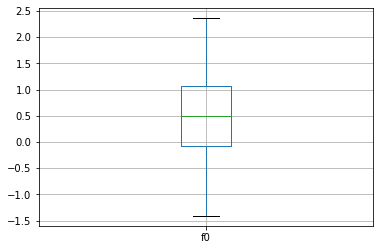

In [21]:
geo_data_0.boxplot('f0')

<AxesSubplot:>

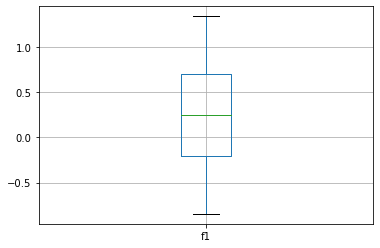

In [22]:
geo_data_0.boxplot('f1')

<AxesSubplot:>

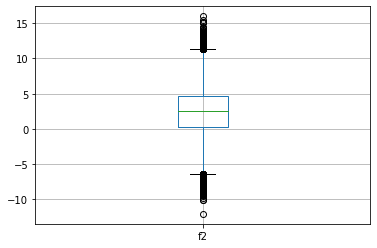

In [23]:
geo_data_0.boxplot('f2')

<AxesSubplot:>

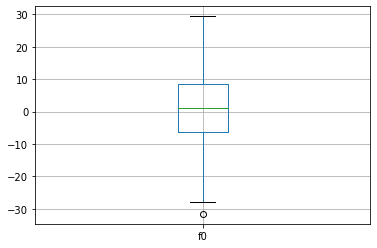

In [24]:
geo_data_1.boxplot('f0')

<AxesSubplot:>

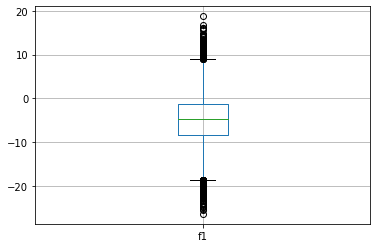

In [25]:
geo_data_1.boxplot('f1')

<AxesSubplot:>

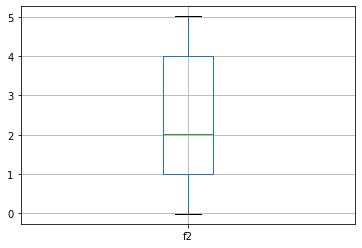

In [26]:
geo_data_1.boxplot('f2')

<AxesSubplot:>

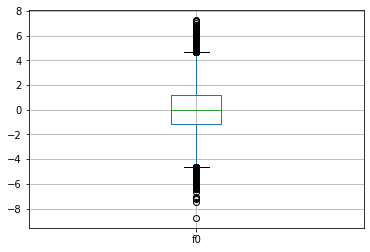

In [27]:
geo_data_2.boxplot('f0')

<AxesSubplot:>

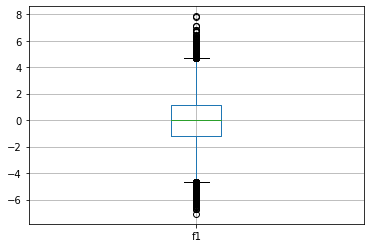

In [28]:
geo_data_2.boxplot('f1')

<AxesSubplot:>

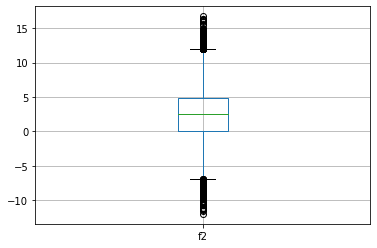

In [29]:
geo_data_2.boxplot('f2')

In [30]:
def remove_outliers(data, column_name):
    q1 = data[column_name].quantile(0.25)
    q3 = data[column_name].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr


    outlier_indices = data[
        (data[column_name] < lower_bound) | (data[column_name] > upper_bound)
    ].index.tolist()

    print(f"Количество удаленных строк: {len(outlier_indices)}")
    return outlier_indices

In [34]:
del_data = [(geo_data_0, 'f2'), 
           (geo_data_1, 'f1'),
           (geo_data_2, 'f0'),
           (geo_data_2, 'f1'),
           (geo_data_2, 'f2'),]   

for data,column in del_data:
    index = remove_outliers(data, column)
    data.drop(index, axis=0, inplace=True)
    
geo_data_0 = geo_data_0.reset_index(drop=True)
geo_data_1 = geo_data_1.reset_index(drop=True)
geo_data_2 = geo_data_2.reset_index(drop=True)

Количество удаленных строк: 506
Количество удаленных строк: 636
Количество удаленных строк: 733
Количество удаленных строк: 682
Количество удаленных строк: 582


In [32]:
geo_data_0.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [33]:
geo_data_1.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


In [ ]:
geo_data_2.corr()

Видим высокую корреляцию в `geo_data_1`  f2.

**Вывод:** мы проверили данные на наличие дублей, пропусков и выбросов. Последние устранили с помощью межквартильного размаха (IQR). Проверели на корреляцию.

## Обучение и проверка модели

In [35]:
def learning(df):
    X = df.drop(['id','product'], axis = 1)
    y = df['product']
    X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                    y, 
                                                    test_size=TEST_SIZE, 
                                                    random_state=RANDOM)
    
    
    pipeline = make_pipeline(StandardScaler(), LinearRegression())
    pipeline.fit(X_train, y_train)
    predict_valid = pipeline.predict(X_valid)
    score = mean_squared_error(y_valid,  predict_valid)**0.5
    predicted_mean = predict_valid.sum() / len(predict_valid)
    all_pred = pipeline.predict(X)
    return y_valid, predict_valid, score, predicted_mean, all_pred

In [36]:
y_valid_0, predict_valid_0, score_0, predicted_mean_0, all_pred_0  = learning(geo_data_0)
score_0

37.815104778634264

In [37]:
y_valid_1, predict_valid_1, score_1, predicted_mean_1, all_pred_1  = learning(geo_data_1)
score_1

0.8911478860562418

In [38]:
y_valid_2, predict_valid_2, score_2, predicted_mean_2, all_pred_2 = learning(geo_data_2)
score_2

40.12959008344122

In [39]:
geo_data_0['all_predict'] = all_pred_0
geo_data_1['all_predict'] = all_pred_1
geo_data_2['all_predict'] = all_pred_2

In [40]:
print('Средний запас:', predicted_mean_0,
        "RMSE модели:", score_0)

print('Средний запас:',predicted_mean_1,
        "RMSE модели:",score_1)

print('Средний запас:', predicted_mean_2,
        "RMSE модели:", score_2)

Средний запас: 92.3505469646708 RMSE модели: 37.815104778634264
Средний запас: 68.54948307873167 RMSE модели: 0.8911478860562418
Средний запас: 94.9517811076183 RMSE модели: 40.12959008344122


**Вывод:**
Таким образом, можно составить следующий рейтинг по среднему запасу: 
1. Второй регион - 94.95 тыс. баррелей.
2. Нулевой регион - 92.35 тыс. баррелей.
3. Первый регион - 68.5 тыс. баррелей.

И по ошибке RMSE:
1. Первый регион - 0.89.
2. Нулевой регион - 37.8.
3. Второй регион - 40.13.

## Подготовка к расчёту прибыли

In [41]:
MAX_POINTS = 500
FINAL_POINTS = 200
MONEY = 10**10
BARREL_PRICE = 450000
MIN_LOSSES = 0.025
BUDGET_200 = MONEY / FINAL_POINTS
VOLUME = MONEY / (BARREL_PRICE) / FINAL_POINTS

In [43]:
print('Достаточный объём сырья для безубыточной разработки новой скважины равен', round(VOLUME, 2), 
      'единиц продукта (тыс. баррелеей)')

Достаточный объём сырья для безубыточной разработки новой скважины равен 111.11 единиц продукта (тыс. баррелеей)


**Вывод:** 
В каждом из трёх регионов средний запас сырья скважины меньше полученного значения достаточного объёма сырья на 18.86, 42.21, 16.16 тыс. баррелей.

## Расчёт прибыли и рисков

In [44]:
def profit(target, probabilities, count, barrel_price, money):
    prob_sort = probabilities.sort_values(ascending=False)
    selected = target[prob_sort.index][:count]
    return int((barrel_price * selected.sum()) - money)

In [50]:
def bootstrap(target, predicted, final_points, budget_200, money):
    values = []
    for i in range(1000):
        target_subsample = target.sample(n=MAX_POINTS, replace=True, random_state=state)
        pred_subsample = predicted[target_subsample.index]
        values.append(profit(target_subsample, 
                             pred_subsample,
                             FINAL_POINTS,
                             BARREL_PRICE,
                             MONEY))
        
    values = pd.Series(values)
    values_mean = int(values.mean())
    lower = int(values.quantile(0.025))
    upper = int(values.quantile(0.975))
    risk = (len(values[values<0]) / len(values)) * 100
    return values_mean, lower, upper, risk

In [51]:
values_mean_0, lower_0, upper_0, risk_0 = bootstrap(y_valid_0, geo_data_0['all_predict'], FINAL_POINTS, BUDGET_200, MONEY)
values_mean_1, lower_1, upper_1, risk_1 = bootstrap(y_valid_1, geo_data_1['all_predict'], FINAL_POINTS, BUDGET_200, MONEY)
values_mean_2, lower_2, upper_2, risk_2 = bootstrap(y_valid_2, geo_data_2['all_predict'], FINAL_POINTS, BUDGET_200, MONEY)

In [52]:
print(f"Регион 0: Средняя прибыль: {values_mean_0}, ", 
      f'95%-й доверительный интервал: от {lower_0} до {upper_0}, ', 
      f'риск убытков: {risk_0:.1f}%')
      
print(f'Регион 1: Средняя прибыль: {values_mean_1}, ', 
      f'95%-й доверительный интервал: от {lower_1} до {upper_1}, ', 
      f'риск убытков: {risk_1:.1f}%')
      
print(f'Регион 2: Средняя прибыль: {values_mean_2}, ', 
      f'95%-й доверительный интервал: от {lower_2} до {upper_2}, ', 
      f'риск убытков: {risk_2:.1f}%')

Регион 0: Средняя прибыль: 412643965,  95%-й доверительный интервал: от -92734758 до 949434431,  риск убытков: 5.9%
Регион 1: Средняя прибыль: 492380568,  95%-й доверительный интервал: от 71717312 до 914489286,  риск убытков: 1.0%
Регион 2: Средняя прибыль: 397722081,  95%-й доверительный интервал: от -141181437 до 920540318,  риск убытков: 7.5%


**Вывод:** 

**Средняя прибыль**

* Средняя прибыль лучших месторождений нулевого региона равна 412 922 476 руб.

* Средняя прибыль лучших месторождений первого региона равна 492 380 568 руб.

* Средняя прибыль лучших месторождений второго региона равна 397 350 278 руб.

**Доверительный интервал**

* 95% доверительный интервал для средней прибыли 200 лучших месторождений нулевого региона: от -92734758 до 949434431

* 95% доверительный интервал для средней прибыли 200 лучших месторождений первого региона: от 71717312 до 914489286

* 95% доверительный интервал для средней прибыли 200 лучших месторождений второго региона: от 141181437 до 920540318

**Риски убытков**

* Риск убытков нулевого региона равен 5.9 %

* Риск убытков первого региона равен 1.0%

* Риск убытков второго региона равен 7.5%

Анализ данных показывает, что первый регион обладает наибольшим потенциалом для разработки скважины по сравнению с другими регионами. 

Это заключение основывается на следующих факторах:

* Высокая прибыльность: Регион 1 демонстрирует наивысшую среднюю прибыль от лучших месторождений. 
* Низкая неопределенность: Доверительный интервал для прогнозируемой прибыли в регионе 1 значительно уже, чем в других регионах, что указывает на более точную оценку. 
* Минимальный риск: Риск получения убытков в регионе 1 является самым низким из всех рассматриваемых регионов.

Сочетание этих факторов делает регион 1 наиболее перспективным для инвестиций.